<a href="https://colab.research.google.com/github/lakshayae162/EDA/blob/main/Chapter7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Module 7 - Exercises**

## **Principal Component Analysis**

In [ ]:
# Step 1: Install and load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#2. Loading dataset
url = 'https://raw.githubusercontent.com/salemprakash/EDA/main/Data/VerbAgg.csv'
data = pd.read_csv(url)


In [14]:
# Step 3:Cleaning data and Extracting numeric data for PCA
data_cleaned = data.drop_duplicates()
print(f"Number of duplicate rows removed: {data.shape[0] - data_cleaned.shape[0]}")

any_missing_values = data.isnull().values.any()
print(f"\nDoes the dataset contain any missing values? {any_missing_values}")

# Standardize the numeric data
numeric_data = data[['Anger', 'id']].values
scaler = StandardScaler()
standardized_data = scaler.fit_transform(numeric_data)

Number of duplicate rows removed: 0

Does the dataset contain any missing values? False


In [16]:
# 4: Perform PCA
pca = PCA()
pca.fit(standardized_data)

# Print PCA results
print("Eigenvalues:", pca.explained_variance_)
print("\nComponent Loadings:\n", pca.components_)

Eigenvalues: [1.05084427 0.94941948]

Component Loadings:
 [[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


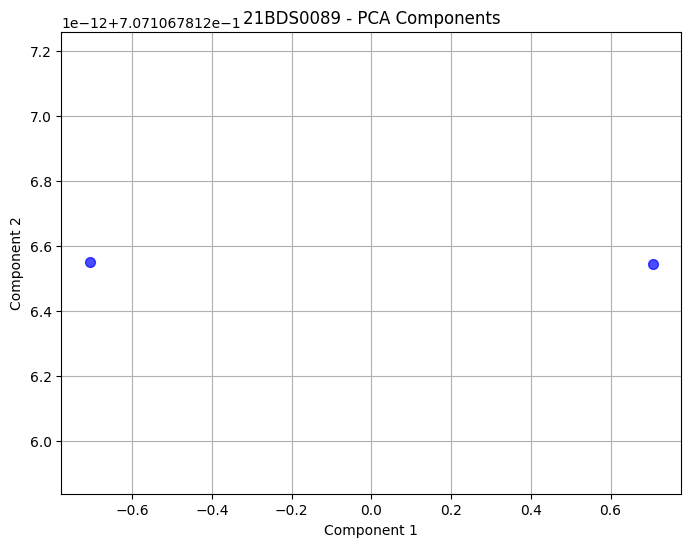

In [17]:
# 5: PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca.components_[0], pca.components_[1], s=50, c='blue', alpha=0.7)
plt.title('21BDS0089 - PCA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid()
plt.show()

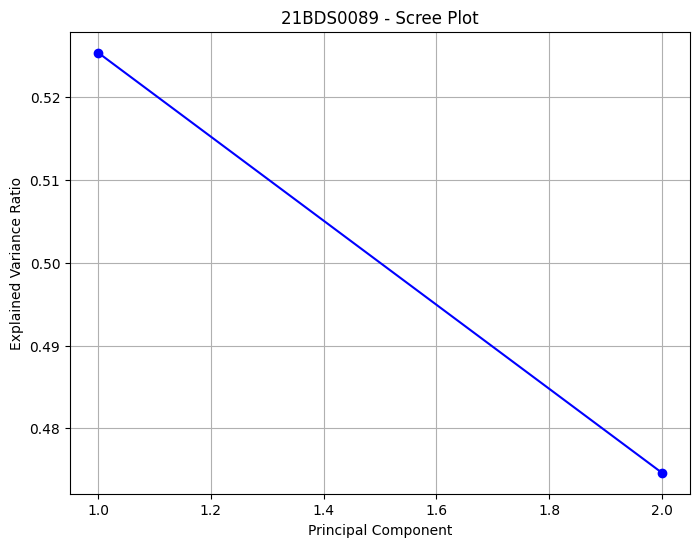

In [18]:
# 6: Scree Plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_, 'o-', color='blue')
plt.title('21BDS0089 - Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid()
plt.show()

In [20]:
# 7: Select desired number of components based on the scree plot
n_comp = 2

In [21]:
# 8: Perform PCA with selected components
pca_n = PCA(n_components=n_comp)
selected_pca = pca_n.fit_transform(standardized_data)

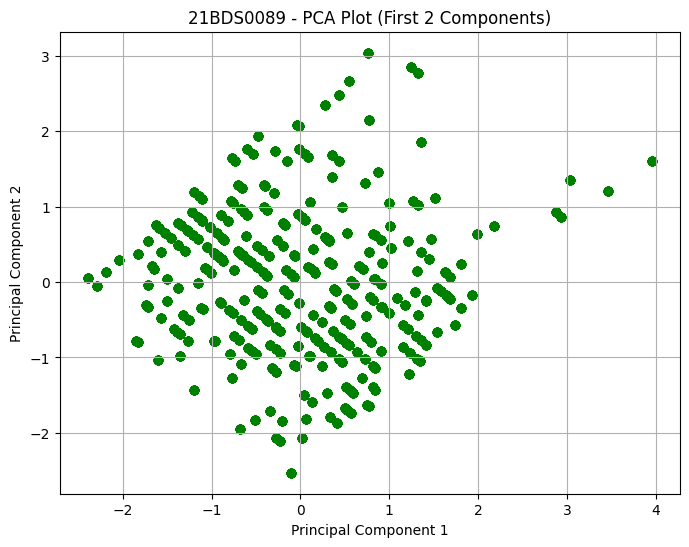

In [22]:
# 9: Plot the selected PCA components
plt.figure(figsize=(8, 6))
plt.scatter(selected_pca[:, 0], selected_pca[:, 1], c='green', alpha=0.7)
plt.title(f'21BDS0089 - PCA Plot (First {n_comp} Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

In [23]:
# 10: Interpret results
print(f"Explained Variance Ratio for {n_comp} components: {pca_n.explained_variance_ratio_}")

Explained Variance Ratio for 2 components: [0.52535286 0.47464714]


## **Linear Regression Analysis**

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
#Data Cleaning
print(data.info())
print(data.describe())

# Handle missing values
data = data.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7584 entries, 0 to 7583
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   rownames  7584 non-null   int64 
 1   Anger     7584 non-null   int64 
 2   Gender    7584 non-null   object
 3   item      7584 non-null   object
 4   resp      7584 non-null   object
 5   id        7584 non-null   int64 
 6   btype     7584 non-null   object
 7   situ      7584 non-null   object
 8   mode      7584 non-null   object
 9   r2        7584 non-null   object
dtypes: int64(3), object(7)
memory usage: 592.6+ KB
None
          rownames        Anger         id
count  7584.000000  7584.000000  7584.0000
mean   3792.500000    20.003165   158.5000
std    2189.456554     4.841139    91.2269
min       1.000000    11.000000     1.0000
25%    1896.750000    17.000000    79.7500
50%    3792.500000    19.000000   158.5000
75%    5688.250000    23.000000   237.2500
max    7584.000000    39.000000   31

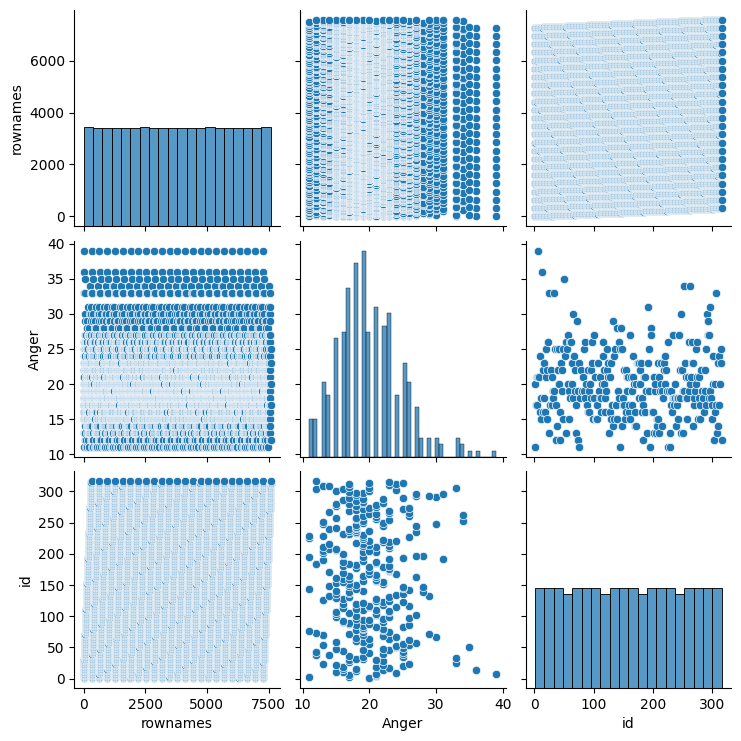

In [26]:
#Identifying relationships
sns.pairplot(data)
plt.show()

In [34]:
#Conversion to numeric
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['btype'] = label_encoder.fit_transform(data['btype'])
print("Categories (btype):", label_encoder.classes_)

Categories (btype): [0 1 2]


In [35]:
#Selecting independent (X) and dependent (Y) features
X = data[['Anger']]
Y = data['btype']

In [36]:
#Training and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)

In [38]:
#Fitting Simple Linear Regression to the Training set
reg1 = LinearRegression()
reg1.fit(X_train, Y_train)

print("Coefficients:", reg1.coef_)
print("Intercept:", reg1.intercept_)

Coefficients: [0.00237355]
Intercept: 0.9524932315584458


In [39]:
#Checking for residuals errors
Y_train_pred = reg1.predict(X_train)
train_mse = mean_squared_error(Y_train, Y_train_pred)
train_r2 = r2_score(Y_train, Y_train_pred)

print("Training MSE:", train_mse)
print("Training R2 Score:", train_r2)


Training MSE: 0.6658095327149451
Training R2 Score: 0.00019804123777755755


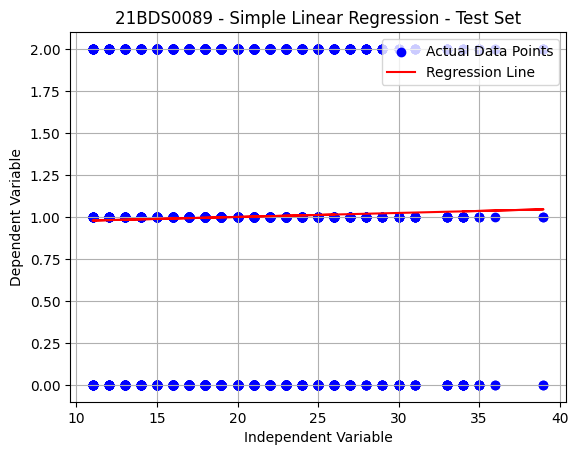

In [40]:
#Predicting the Test set results
y_pred = reg1.predict(X_test)

# Visualize the Test set results
plt.scatter(X_test, Y_test, color='blue', label='Actual Data Points')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.title('21BDS0089 - Simple Linear Regression - Test Set')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.legend()
plt.grid()
plt.show()
